##### All The Best

** What is 8 to the power of 4?**

In [1]:
pow(8,4)

4096

** Given this nested list, use indexing to grab the word "Zalego" **
List1=[1,2,[3,4],[5,[100,200,['Zalego']],23,11],1,7]

In [2]:
List1=[1,2,[3,4],[5,[100,200,['Zalego']],23,11],1,7]

In [3]:
List1[3][1][2]

['Zalego']

** Given this nest dictionary grab the word "Zalego". Be prepared, this will be annoying/tricky **
d = {'k1':[1,2,3,{'tricky':['oh','man','Zalego',{'target':[1,2,3,'hello']}]}]}

In [4]:
d = {'k1':[1,2,3,{'tricky':['oh','man','Zalego',{'target':[1,2,3,'hello']}]}]}

In [5]:
d['k1'][3]['tricky'][2]

'Zalego'

** What is the main difference between a tuple and a list? **

A list is mutable while a tuple is immutable

List a = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]. 
Write one line of Python that takes this list a and makes a new list 
that has only the even elements of this list in it.

In [6]:
a = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [7]:
list(filter(lambda x:x%2==0 , a))

[4, 16, 36, 64, 100]

**You are driving a little too fast, and a police officer stops you. Write a function
  to return one of 3 possible results: "No ticket", "Small ticket", or "Big Ticket". 
  If your speed is 80 or less, the result is "No Ticket". If speed is between 81 
  and 90 inclusive, the result is "Small Ticket". If speed is 91 or more, the result is "Big    Ticket". Unless it is your birthday (encoded as a boolean value in the parameters of the function) -- on your birthday, your speed can be 5 higher in all 
  cases. **

In [8]:
#A function to give Tickets depending on the speed limit on a given day
#The last digit in range not included in the range specified
def caught_speeding(speed, is_birthday):
        if bool(is_birthday)==True:
            if speed in range(0,81):
                return "No Ticket"
            elif speed in range(81,91):
                return "Small Ticket"
            else:
                return "Big Ticket"
        else:
            if speed in range(0,86):
                return "No Ticket" 
            elif speed in range(61,96):
                return "Small Ticket"
            else:
                return "Big Ticket"

# 911 Calls 

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [9]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [10]:
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [11]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


** Check the head of df **

In [13]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [14]:
df['zip'].value_counts().head()

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [15]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [16]:
df['twp'].value_counts().head()

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [17]:
df['Code'] = df['title'].apply(lambda x:x.split(':')[1])
np.sum(pd.value_counts(pd.unique(df['Code'])))

90

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [18]:
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [19]:
pd.value_counts(df['Reason']).head(1)

EMS    161441
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

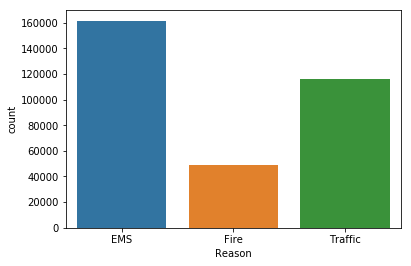

In [20]:
sns.countplot(x='Reason',data=df)